In [65]:
import h5py
import numpy as np
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy
import tensorflow as tf
import random
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix


In [16]:
f = h5py.File('bird_spectrograms.hdf5', 'r')

In [18]:
for key in list(f.keys()):
    print(key,f[key].shape)

amecro (128, 517, 66)
amerob (128, 517, 172)
bewwre (128, 517, 144)
bkcchi (128, 517, 45)
daejun (128, 517, 125)
houfin (128, 517, 84)
houspa (128, 517, 630)
norfli (128, 517, 37)
rewbla (128, 517, 187)
sonspa (128, 517, 263)
spotow (128, 517, 137)
whcspa (128, 517, 91)


## Binnary Classification

Chosen two bird species of similar amerob(American Robin) and rewbla(Red-winged Robin).
Since these two have same number of samples so the class imbalance issue will not be seen .

In [22]:
bird_1 = np.transpose(f['amerob'], (2, 0, 1))  # (172, 128, 517)
bird_2 = np.transpose(f['rewbla'], (2, 0, 1))  # (144, 128, 517)

In [24]:
# labelling the bird species
y_A = np.zeros(bird_1.shape[0]) # 0 - bird amerob
y_B = np.ones(bird_2.shape[0]) # 1 - bird rewbla

In [26]:
X = np.concatenate((bird_1, bird_2), axis = 0)
X.shape

(359, 128, 517)

In [28]:
Y = np.concatenate((y_A,y_B), axis = 0)
Y.shape

(359,)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state = 1)
X_train = X_train / np.max(X_train)
X_test = X_test /np.max(X_test)

## Model1

In [33]:
np.random.seed(5322)
tf.random.set_seed(5322)
random.seed(5322)

In [35]:
np.random.seed(123)
tf.random.set_seed(123)
model1 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 517, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D(2, 2),
    # flatten layer
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])
model1.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 515, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 257, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 255, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 127, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 243840)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    31,211,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,230,593 (119.14 MB)

 Trainable params: 31,230,593 (119.14 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
%%time
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history1 = model1.fit(X_train, y_train, epochs = 10, batch_size = 16, validation_data = (X_test, y_test))
score = model1.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step - accuracy: 0.4543 - loss: 160713760.0000 - val_accuracy: 0.5139 - val_loss: 5703.6274
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 203ms/step - accuracy: 0.6046 - loss: 3113.3301 - val_accuracy: 0.5694 - val_loss: 832.6813
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 204ms/step - accuracy: 0.6254 - loss: 148.3321 - val_accuracy: 0.4722 - val_loss: 712.8021
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - accuracy: 0.6620 - loss: 23.2188 - val_accuracy: 0.4583 - val_loss: 641.5543
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 215ms/step - accuracy: 0.6835 - loss: 17.9404 - val_accuracy: 0.4722 - val_loss: 766.1569
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - accuracy: 0.7103 - loss: 16.0051 - val_accuracy: 0.4583 - val_loss: 710.9114
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - accuracy: 0.7083 - loss: 7.8787 - val_accuracy: 0.4583 - val_loss: 641.8376
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - accuracy: 0.7113 - 

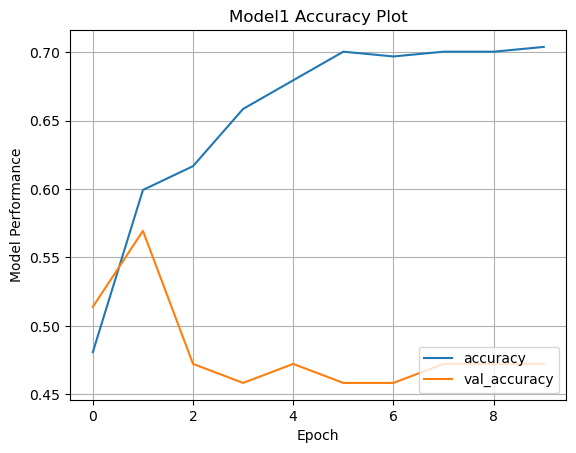

In [39]:
plt.plot(history1.history['accuracy'], label = 'accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model1 Accuracy Plot')
plt.ylabel('Model Performance')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.grid()
plt.show();

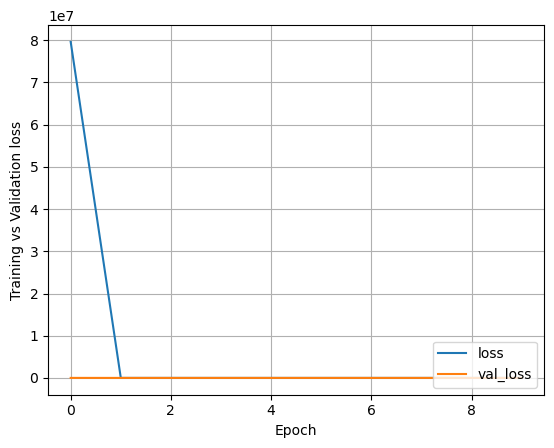

In [41]:
plt.plot(history1.history['loss'], label = 'loss')
plt.plot(history1.history['val_loss'], label = 'val_loss')
plt.ylabel('Training vs Validation loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='lower right')
plt.grid()
plt.show();

In [45]:
test_loss, test_accuracy = model1.evaluate(X_test, y_test)
print(f"Testing Loss: {test_loss}, Testing Accuracy: {test_accuracy}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4705 - loss: 670.9443
Testing Loss: 594.0101318359375, Testing Accuracy: 0.4722222089767456


In [51]:
y_pred_probs = model1.predict(X_test)

y_pred = (y_pred_probs >= 0.5).astype(int)
y_true = y_test.flatten()
print(classification_report(y_test, y_pred, zero_division = 0, target_names = ['American Robin', 'Red-winged Blackbird']))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
                      precision    recall  f1-score   support

      American Robin       0.33      0.12      0.17        34
Red-winged Blackbird       0.50      0.79      0.61        38

            accuracy                           0.47        72
           macro avg       0.42      0.45      0.39        72
        weighted avg       0.42      0.47      0.41        72



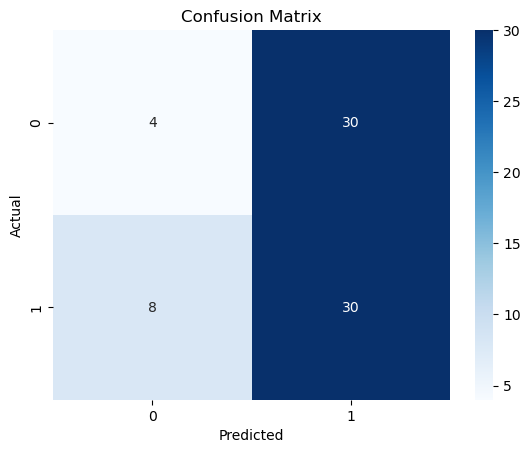

In [61]:
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Overfitting
The model learns the training data well (high training accuracy), but generalizes poorly to unseen data (lower validation accuracy).\
The widening gap between accuracy and val_accuracy confirms this.\
The model converges early, like in above case where training accuracy climbs rapidly and flattens around epoch 3–4.

## Model2

To reduce overfitting
- Adding dropout = 0.25
- Early stopping since the model1 converged at early stage. This is to avoid overtraining by stopping when validation loss stops improving.
- Increasing number of epochs to 20 for the possibility of improvement in the accuracy.


In [85]:
model2 = Sequential([
    # layer group 1
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (128, 517, 1)),
    MaxPooling2D(pool_size = (2, 2)),
    Dropout(rate = 0.2),
    # layer group 2
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Dropout(rate = 0.2),
    # pooling to keep # of parameters in check
    Flatten(),
    # dense layers
    Dense(units = 128, activation = 'relu'),
    Dropout(rate = 0.2),
    Dense(units = 1, activation = 'sigmoid')
])
# compile model
model2.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

# model summary
model2.summary()

# early stopping since previous model did not improve after 3rd/4th epoch
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
start_time = time.time()
# train the model
history2 = model2.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 16,
    validation_data = [X_test, y_test],
    callbacks = [early_stopping]
)
end_time = time.time()
training_duration = end_time - start_time
print(f"\n Training completed in {training_duration:.2f} seconds (~{training_duration/60:.2f} minutes)")
test_loss, test_acc = model2.evaluate(X_test, y_test)
print(f'\nTest accuracy: {test_acc}')

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 126, 515, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 63, 257, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 63, 257, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 61, 255, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 30, 127, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 30, 127, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 243840)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │    31,211,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,230,593 (119.14 MB)

 Trainable params: 31,230,593 (119.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 231ms/step - accuracy: 0.4107 - loss: 151505616.0000 - val_accuracy: 0.5417 - val_loss: 1806.0634
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 221ms/step - accuracy: 0.5139 - loss: 70810.1016 - val_accuracy: 0.4861 - val_loss: 64.7745
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 222ms/step - accuracy: 0.5307 - loss: 8718.0430 - val_accuracy: 0.5417 - val_loss: 59.5934
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 228ms/step - accuracy: 0.5297 - loss: 3841.8018 - val_accuracy: 0.5417 - val_loss: 32.8406
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 231ms/step - accuracy: 0.4837 - loss: 3414.2253 - val_accuracy: 0.5417 - val_loss: 9.7079
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 235ms/step - accuracy: 0.5512 - loss: 2431.0090 - val_accuracy: 0.5417 - val_loss: 0.6828
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 244ms/step - accuracy: 0.5248 - loss: 1527.5596 - val_accuracy: 0.5417 - val_loss: 0.6827
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 244ms/step - accuracy: 0.4905 

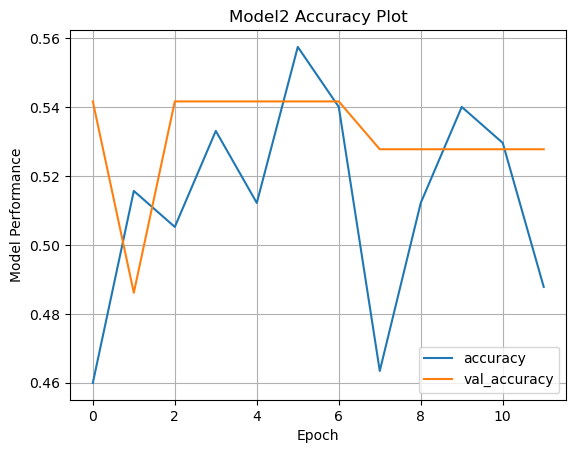

In [89]:
plt.plot(history2.history['accuracy'], label = 'accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model2 Accuracy Plot')
plt.ylabel('Model Performance')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.grid()
plt.show();

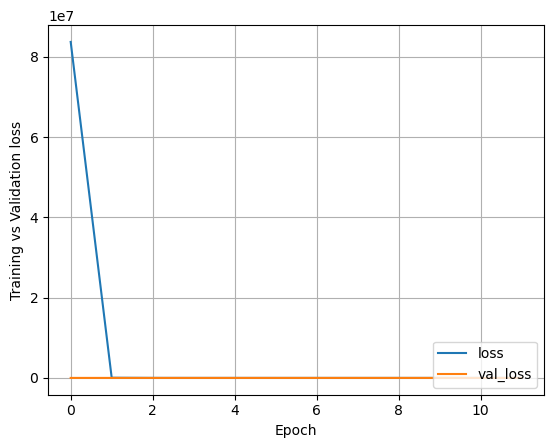

In [93]:
plt.plot(history2.history['loss'], label = 'accuracy')
plt.plot(history2.history['val_loss'], label = 'val_accuracy')
plt.ylabel('Training vs Validation loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='lower right')
plt.grid()
plt.show();

In [95]:
train_loss, train_accuracy= model2.evaluate(X_train, y_train)
print(f"Training Loss: {train_loss}, Training Accuracy = {train_accuracy}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.5001 - loss: 0.6878
Training Loss: 0.6879144906997681, Training Accuracy = 0.5226480960845947


In [97]:
test_loss, test_accuracy = model2.evaluate(X_test, y_test)
print(f"Testing Loss: {test_loss}, Testing Accuracy: {test_accuracy}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5404 - loss: 0.6795
Testing Loss: 0.6827271580696106, Testing Accuracy: 0.5416666865348816


In [99]:
y_pred_probs2 = model2.predict(X_test)

y_pred2 = (y_pred_probs2 >= 0.5).astype(int)
y_true = y_test.flatten()
print(classification_report(y_test, y_pred2, zero_division = 0, target_names = ['American Robin', 'Red-winged Blackbird']))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
                      precision    recall  f1-score   support

      American Robin       1.00      0.03      0.06        34
Red-winged Blackbird       0.54      1.00      0.70        38

            accuracy                           0.54        72
           macro avg       0.77      0.51      0.38        72
        weighted avg       0.75      0.54      0.39        72



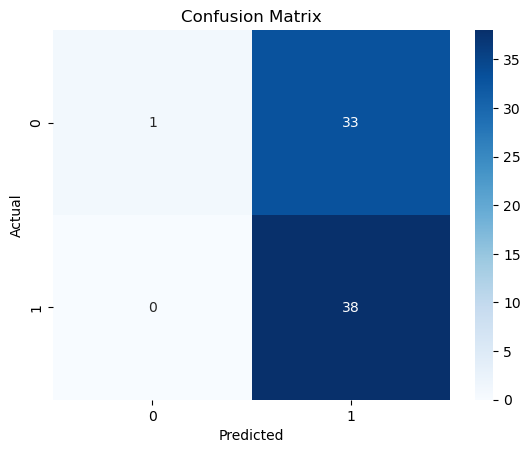

In [101]:
cm1 = confusion_matrix(y_true, y_pred2)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Now the updated model shows an improvement in the generalization. Adding dropout rate to 0.25 improved learning capacity.\
Further improve the perfromance of the model by tuning other parameters and try.

## Model 3

- Increasing number of hidden layers to 4
- Added batch normalization
- Increasing to epochs = 50 and early stopping.
- Decreasing the Learning rate from 0.001 to 0.0001.
- Changing batch size from 16 to 32.

In [137]:
model3 = Sequential([
    # layer group 1
    Conv2D(16, (3, 3), activation = 'relu', input_shape = (128, 517, 1), padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2, 2)),
    Dropout(rate = 0.2),
    # layer group 2
    Conv2D(32, (3, 3), activation = 'relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2, 2)),
    Dropout(rate = 0.2),
    # layer group 3
    Conv2D(64, (3, 3), activation = 'relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2, 2)),
    Dropout(rate = 0.2),
    # layer group 4
    Conv2D(128, (3, 3), activation = 'relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2)),
    Dropout(rate = 0.2),
    # Average pooling
    GlobalAveragePooling2D(),
    # dense layers
    Dense(units = 128, activation = 'relu'),
    Dropout(rate = 0.2),
    Dense(units = 1, activation = 'sigmoid')
])
# compile model
model3.compile(
    optimizer = Adam(learning_rate = 0.0001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

# model summary
model3.summary()
# early stopping with less patience
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, mode="min", restore_best_weights = True)
start_time = time.time()
# train the model
history3 = model3.fit(
    X_train, y_train,
    epochs = 50,
    batch_size = 32,
    validation_data = (X_test, y_test),
    callbacks = [early_stopping]
)
end_time = time.time()
training_duration = end_time - start_time
print(f"\n Training completed in {training_duration:.2f} seconds (~{training_duration/60:.2f} minutes)")

# evaluate the model
test_loss, test_acc = model3.evaluate(X_test, y_test)
print(f'\nTest accuracy: {test_acc}')

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_68 (Conv2D)              │ (None, 128, 517, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_52          │ (None, 128, 517, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_68 (MaxPooling2D) │ (None, 64, 258, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_86 (Dropout)            │ (None, 64, 258, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_69 (Conv2D)              │ (None, 64, 258, 32)    │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_53          │ (None, 64, 258, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_69 (MaxPooling2D) │ (None, 32, 129, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_87 (Dropout)            │ (None, 32, 129, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_70 (Conv2D)              │ (None, 32, 129, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_54          │ (None, 32, 129, 64)    │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_70 (MaxPooling2D) │ (None, 16, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_88 (Dropout)            │ (None, 16, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (None, 16, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_55          │ (None, 16, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_71 (MaxPooling2D) │ (None, 8, 32, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_89 (Dropout)            │ (None, 8, 32, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_13     │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_90 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 114,753 (448.25 KB)

 Trainable params: 114,273 (446.38 KB)

 Non-trainable params: 480 (1.88 KB)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 479ms/step - accuracy: 0.5459 - loss: 0.7020 - val_accuracy: 0.5278 - val_loss: 0.6951
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 438ms/step - accuracy: 0.5935 - loss: 0.6850 - val_accuracy: 0.5556 - val_loss: 0.6811
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 437ms/step - accuracy: 0.5421 - loss: 0.6812 - val_accuracy: 0.6250 - val_loss: 0.6776
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 450ms/step - accuracy: 0.6148 - loss: 0.6877 - val_accuracy: 0.4861 - val_loss: 0.6836
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 451ms/step - accuracy: 0.5788 - loss: 0.6766 - val_accuracy: 0.4861 - val_loss: 0.6892
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 466ms/step - accuracy: 0.6149 - loss: 0.6736 - val_accuracy: 0.4861 - val_loss: 0.6868
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 480ms/step - accuracy: 0.6410 - loss: 0.6641 - val_accuracy: 0.4861 - val_loss: 0.6817
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 490ms/step - accuracy: 0.6543 - loss: 0.6627 - val_accuracy: 0.6111 - val_loss:

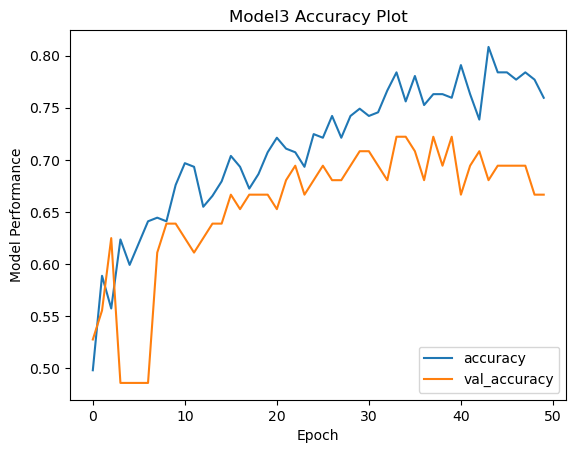

In [139]:
plt.plot(history3.history['accuracy'], label = 'accuracy')
plt.plot(history3.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model3 Accuracy Plot')
plt.ylabel('Model Performance')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show();

In [141]:
y_pred_probs3 = model3.predict(X_test)

y_pred3 = (y_pred_probs3 >= 0.5).astype(int)

print(classification_report(y_test, y_pred3, zero_division = 0, target_names = ['American Robin', 'Red-winged Blackbird']))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
                      precision    recall  f1-score   support

      American Robin       0.77      0.50      0.61        34
Red-winged Blackbird       0.66      0.87      0.75        38

            accuracy                           0.69        72
           macro avg       0.72      0.68      0.68        72
        weighted avg       0.71      0.69      0.68        72



Final validation accuracy reaches ~0.72, showing good generalization and reduces overfitting.
- Using GlobalAveragePooling2D() reduces the total parameters while preserving spatial information.
- Using BatchNormalization improves training stability and speeds up convergence.